# Materials and code to create images of the LORA paper and annex (streptococcus)

In [1]:
%matplotlib inline
from pylab import *

In [2]:
rcParams['figure.figsize'] = (8,8)

In [3]:
import glob
import os
from tqdm import tqdm
from sequana import *
from sequana import FastA, FastQ
from sequana.pacbio import PacbioSubreads

In [27]:
import importlib
import utils  # your module
importlib.reload(utils)

<module 'utils' from '/home/cokelaer/Work/1_Projects/LORA/paper_LORA/utils.py'>

# Data Download

In [23]:
os.makedirs("data/streptococcus", exist_ok=True)
utils.download_streptococcus_data()

🚀 Running: fastq-dump --gzip -O data/streptococcus SRR24332397
📦 Tracking file size...


7.08GB [2:15:15, 872kB/s]                                                                                                                                                                                                                     

Read 2552698 spots for SRR24332397
Written 2552698 spots for SRR24332397


7.08GB [2:15:20, 872kB/s]

✅ Download complete: data/streptococcus/SRR24332397.fastq.gz


## Raw data (fastq) stats  -- information for the table and annex

In [38]:
f = FastQ('data/streptococcus/SRR24332397.fastq.gz')
ss = f.stats()
print(ss)
coverage = ss['sum_read_length'] / utils.genome_size['streptococcus']
print(f"coverage: {coverage}")

{'N': 2552698, 'mean_length': np.float64(8906.19075581992), 'total_length': 22734815330, 'N50': np.int64(11343), 'L50': np.int64(726752), 'min_length': 50, 'max_length': 116892, 'mean_read_length': np.float64(8906.19075581992), 'sum_read_length': 22734815330}
coverage: 10285.338615912884


## Hifi stats -- information for the table and annex

In [39]:
f = FastQ('data/streptococcus//hifi.ccs.fastq.gz')
ss = f.stats()
print(ss)
coverage = ss['sum_read_length'] / utils.genome_size['streptococcus']
print(f"coverage: {coverage}")

{'N': 34013, 'mean_length': np.float64(7319.489930320759), 'total_length': 248957811, 'N50': np.int64(7811), 'L50': np.int64(13884), 'min_length': 43, 'max_length': 12320, 'mean_read_length': np.float64(7319.489930320759), 'sum_read_length': 248957811}
coverage: 112.62969811030533


## Figure in the annex

💾 Saved paper_images/streptococcus/GC_vs_length.eps in pdf/eps/png


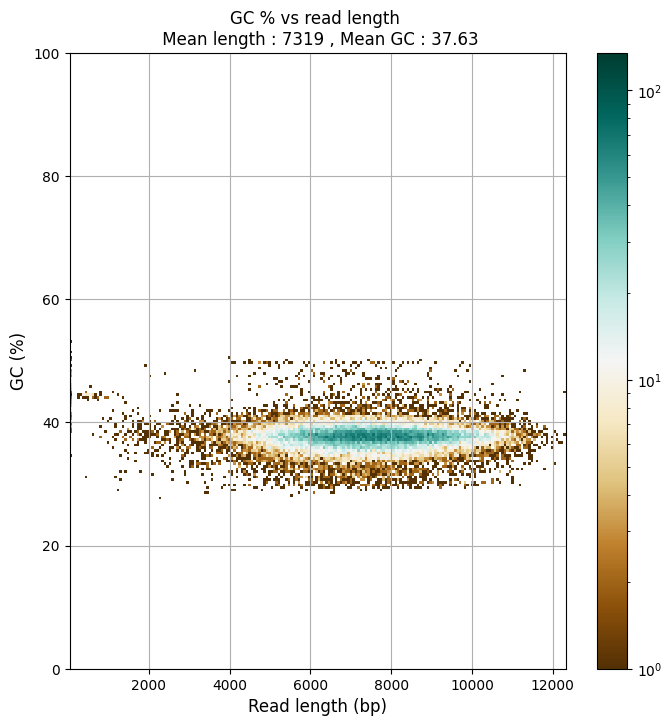

In [28]:
f.plot_GC_read_len(maxreads=200000)
utils.saveall("paper_images/streptococcus/GC_vs_length")

## Repeats -- figure in the annex

💾 Saved paper_images/streptococcus/repeats.eps in pdf/eps/png


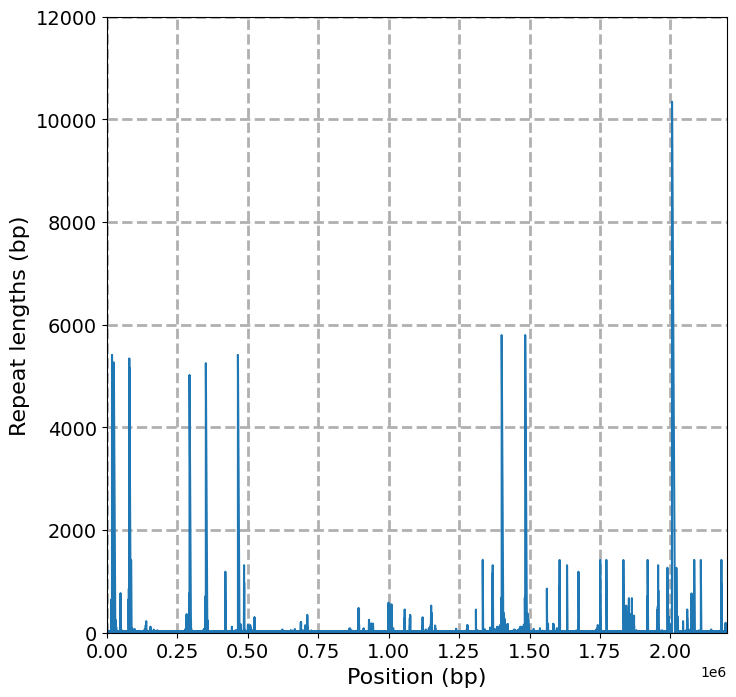

In [29]:
r = Repeats("GoldStandard/streptococcus.fa")
r.threshold = 10
r.plot()
ylim([0,12000])
xlim([0, 2.2e6])
grid(True, lw=2, ls="--")
xlabel("Position (bp)", fontsize=16)
xticks(fontsize=14)
yticks(fontsize=14)
ylabel("Repeat lengths (bp)", fontsize=16)
utils.saveall("paper_images/streptococcus/repeats")

# Some stats on GC and length

In [32]:
f = FastA("GoldStandard/streptococcus.fa")
L = f.get_stats()['total_length']
GC = f.GC_content()
print(L, round(GC,1))

2223139 37.7


# BUSCO meta analysis for the Results section

In [33]:
bf = utils.BUSCOFactory()
assert len(bf.busco_df) >0

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 42/42 [00:00<00:00, 343.80it/s]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


💾 Saved paper_images/streptococcus/busco_streptococcus.eps in pdf/eps/png


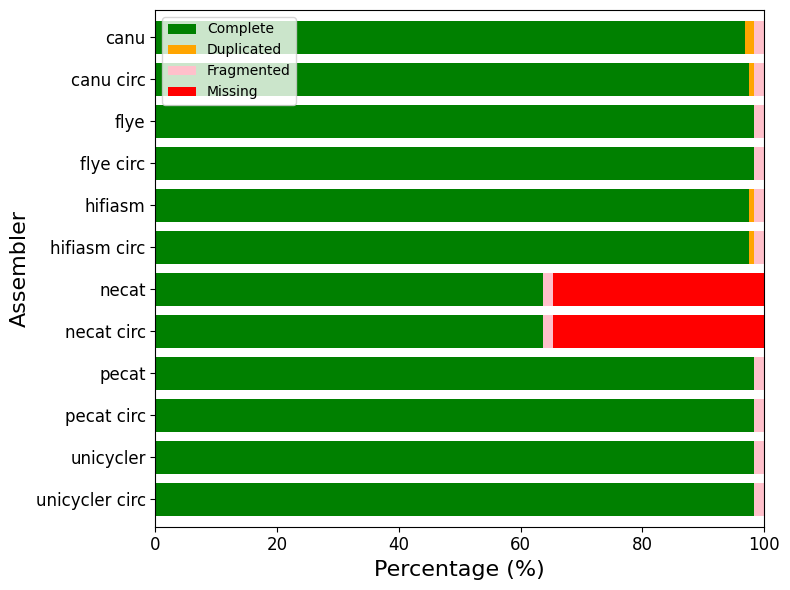

In [34]:
bf.plot_busco_summary_bar("streptococcus")
utils.saveall("paper_images/streptococcus/busco_streptococcus")



# Checkm meta analysis (not used but useful)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


💾 Saved paper_images/streptococcus/checkm_streptococcus.eps in pdf/eps/png


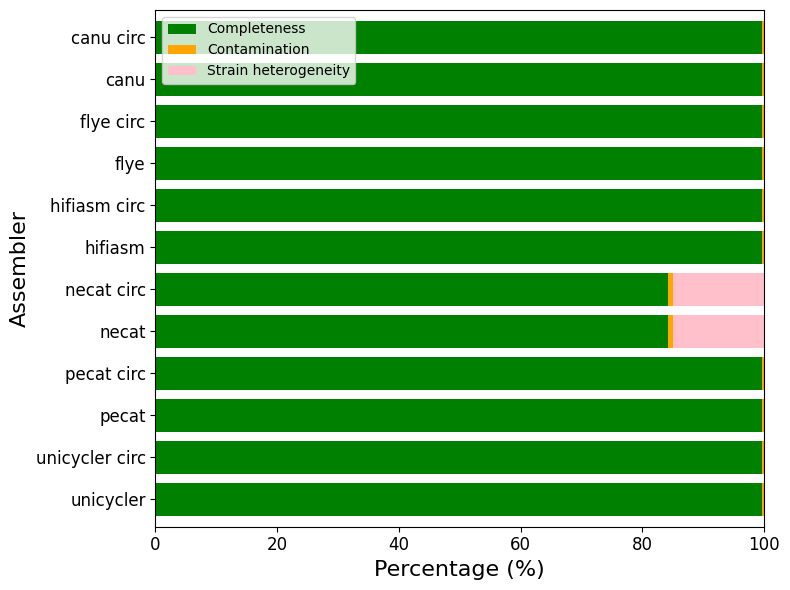

In [35]:
cm = utils.CheckMFactory()
cm.plot_checkm_summary_bar("streptococcus")
utils.saveall("paper_images/streptococcus/checkm_streptococcus")


# table contigs

Reading file
💾 Saved paper_images/streptococcus/streptococcus_contigs_summary.eps in pdf/eps/png


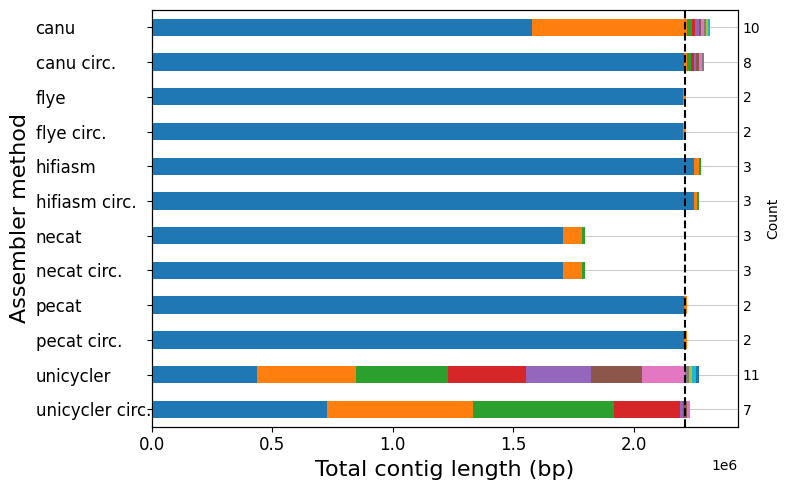

In [37]:
pl = utils.PlotContigs("streptococcus")
pl.plot_assembly_results()
utils.saveall("paper_images/streptococcus/streptococcus_contigs_summary")